<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="https://www.editorialuoc.cat/deep-learning" target="_blank\">Deep learning: Principios y fundamentos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (UOC)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Capítulo 5: Ejemplo de funcionamiento de Autoencoder

En este ejemplo veremos un caso de aplicación para un autoencoder. En concreto, nos centraremos en la compresión y reconstrucción de imágenes empleando *autoencoders*.

<u>Nota</u>: Este ejemplo está basado en https://blog.keras.io/building-autoencoders-in-keras.html

Deshabilitamos la aparición de warnings.

<u>Nota</u>: No se recomienda este paso cuando se está desarrollando el código.

In [4]:
import warnings

warnings.filterwarnings('ignore')

## 1. Carga del conjunto de datos

En primer lugar, cargamos el conjunto de datos, que en este caso será el dataset de dígitos [MNIST](https://en.wikipedia.org/wiki/MNIST_database). 

Realizamos esta carga, directamente, a partir de la librería [Keras](https://keras.io/).

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## 2. Creación del *autoencoder*

A continuación, creamos el *autoencoder* en su forma más senzilla:
- A partir de las imágenes de entrada de de 28x28 píxeles en escala de grises, se crea una capa con 784 valores de entrada
- Creamos un **codificador** (*encoder*) con una representación de 32 neuronas
- Creamos un **decodificador** (*decoder*) que genere una salida en la misma resolución que las imágenes de entrada, es decir, 784 neuronas de salida para generar una imagen de 28x28 píxeles en escala de grises.

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# Tamanño de la representación interna del autoencoder
encoding_dim = 32

# capa de entrada
input_img = Input(shape=(784,))
# representación interna (encoded)
encoded = Dense(encoding_dim, activation='relu')(input_img)
# salida del autoencoder, es decir, la imagen reconstruida (decoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# el modelo completo de autoencoder, que apila la entrada y la salida
autoencoder = Model(input_img, decoded)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Para finalidades didácticas, definimos el modelo `encoder` que genera la codificación interna del autoencoder, sin el proceso de decodificación.

In [8]:
# este modelo crea la representación interna
encoder = Model(input_img, encoded)

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


De forma similar, definimos el modelo `decoder` que a partir de la representación interna (32 valores) reconstruye la imagen, es decir, aplica el proceso de decodificación.

In [9]:
# capa de entrada de la representación interna
encoded_input = Input(shape=(encoding_dim,))
# obtener la última capa del autoencoder definido previamente
decoder_layer = autoencoder.layers[-1]
# creación del modelo
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


Finalmente, definimos el optimizador y la función de pérdida empleada para el entrenamiento del *autoencoder*.

## 3. Entrenamiento del *autoencoder*

En el siguiente fragmento de código se entrena el *autoencoder* creado anteriormente.

Los hiperparámetros para ajustar el entrenamiento, además del optimizador y función de pérdida, son:
- número de épocas del entrenamiento
- tamaño del lote

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
n_epochs = 50
n_batch_size = 256

In [12]:
mfit = autoencoder.fit(x_train, x_train,
                epochs=n_epochs,
                batch_size=n_batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3791 - val_loss: 0.2724
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2649 - val_loss: 0.2543
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2445 - val_loss: 0.2323
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2243 - val_loss: 0.2141
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2087 - val_loss: 0.2012
Epoch 6/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1979 - val_loss: 0.1921
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1899 - val_loss: 0.1850
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1833 - val_loss: 0.1789
Epoch 9/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1774 - val_loss: 0.1733
Epoch

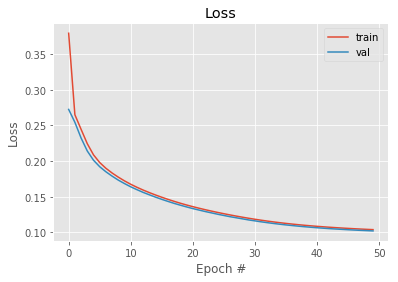

In [25]:
import matplotlib.pyplot as plt

# Plot del training loss
plt.style.use("ggplot")

plt.plot(np.arange(0, n_epochs), mfit.history["loss"], label="train")
plt.plot(np.arange(0, n_epochs), mfit.history["val_loss"], label="val")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

## 4. Visualización de los resultados

Finalmente, presentaremos los resultados de aplicar el *autoencoder* en algunos ejemplos del conjunto de datos de test.

In [34]:
# codificamos y decodificamos las imágenes de test
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Notese que este paso se puede realizar en un solo paso, empleando:

> decoded_imgs = autoencoder.predict(x_test)

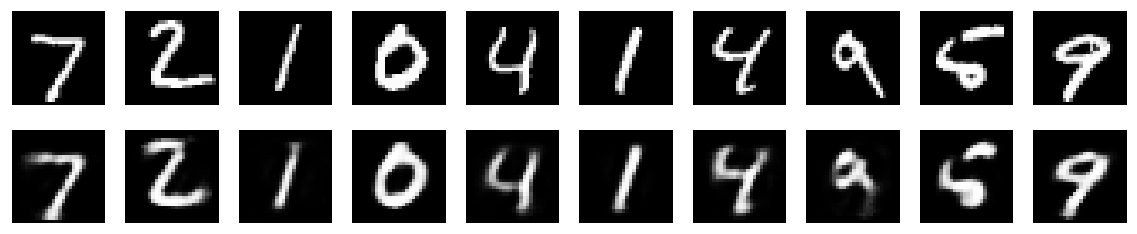

In [35]:
import matplotlib.pyplot as plt

n = 10  # cantidad de ejemplos que mostrar
plt.figure(figsize=(20, 4))

for i in range(n):
    # mostrar la imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar la reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()